In [1]:
!pip install matplotlib

     |████████████████████████████████| 9.4 MB 7.0 MB/s eta 0:00:01     |███████████████████████████▊    | 8.1 MB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 10.7 MB/s eta 0:00:01     |█████████████                   | 389 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 11.6 MB/s eta 0:00:01


In [2]:
from prepare_movielens import prepare_datasets
prepare_datasets()

In [3]:
from models_xgbr import load_and_preprocess_movielens_df, train_xgboost_model

In [4]:
train_transformed2, test_transformed2 = load_and_preprocess_movielens_df()

model2 = train_xgboost_model(train_transformed2)
X, y = test_transformed2[["userId", "movieId", "genres"]], test_transformed2["rating"]

          userId  movieId  rating                             genres
0              1      296     5.0   [Comedy, Crime, Drama, Thriller]
264            3      296     5.0   [Comedy, Crime, Drama, Thriller]
912            4      296     4.0   [Comedy, Crime, Drama, Thriller]
1184           5      296     4.0   [Comedy, Crime, Drama, Thriller]
1290           7      296     4.0   [Comedy, Crime, Drama, Thriller]
...          ...      ...     ...                                ...
18738851  121477   198159     3.0                      [Documentary]
18743100  121499   133735     0.5                      [Documentary]
18743104  121499   133745     0.5  [Action, Children, Comedy, Drama]
18748497  121536   173919     4.0                        [Animation]
18749549  121554   199878     4.0                [Animation, Horror]

[18750072 rows x 4 columns]


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'memory': None, 'steps': [('encode_genres', ColumnTransformer(remainder='passthrough',
                  transformers=[('genre_tr',
                                 CountVectorizer(analyzer=<class 'set'>),
                                 'genres')],
                  verbose_feature_names_out=False)), ('xgb', XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...

In [5]:
train_transformed2[train_transformed2.isna().any(axis=1)]

,userId,movieId,rating,genres


In [6]:
from sklearn.metrics import mean_squared_error
preds2 = model2.predict(X)
print(f"RMSE: {mean_squared_error(y, preds2, squared=False)}")
print(f"min{min(preds2)}, max={max(preds2)}")

RMSE: 0.9878193578246395
min1.0998142957687378, max=4.4167962074279785


In [7]:
test_eval = test_transformed2.copy()
test_eval["preds"] = preds2

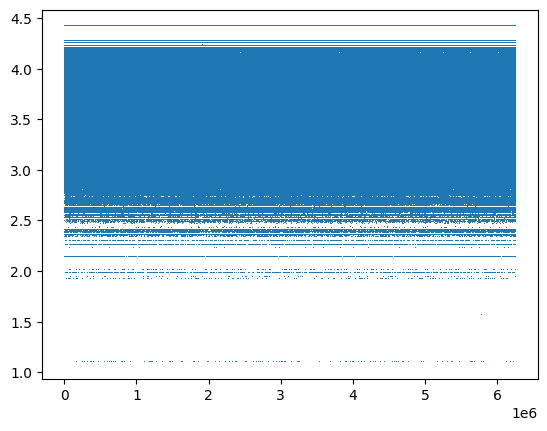

In [8]:
from matplotlib import pyplot as plt
plt.figure()
plt.clf()
plt.plot(test_eval["preds"], marker=",", linestyle="None")

In [9]:
preds_df = test_eval.drop("genres", axis=1)
preds_df

,userId,movieId,rating,preds
0,121557,4027,3.0,3.804887
774,121562,4027,4.0,3.804887
2741,121579,4027,5.0,3.804887
3699,121588,4027,3.0,3.804887
4132,121589,4027,4.5,3.804887
...,...,...,...,...
6240807,162508,91065,1.5,3.624109
6240817,162508,101072,2.0,3.226395
6249273,162534,174923,3.0,3.518687
6249290,162534,184107,3.0,3.504322


In [10]:
preds_df.to_csv("xgbr_preds.csv")